<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Ayudantia_11_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Vamos a tener que considerar una versión finita. $J=\max \{n:a_n>0\} $

In [3]:
np.random.seed(0)
J=10**3
a=np.random.uniform(0,1,size=J+1)
a=a/np.sum(a)
r=0.25
def simulation(init_cond,max_iter=10**6):
    num_iter=0
    present=init_cond
    historia=[present]
    primer_retorno=0
    hist_pri_ret=[]
    while(num_iter<max_iter):
        if(present==0):
            next=np.random.choice(np.arange(0,J+1,1),p=a)
        else:
            next=np.random.choice([present,present-1],p=[r,1-r])
        historia.append(next)
        present=next
        num_iter+=1
        primer_retorno+=1
        if(present==init_cond):
            hist_pri_ret.append(primer_retorno)
            primer_retorno=0
    return historia,hist_pri_ret

In [5]:
init_conds=np.arange(1,600,50)
medias=[]
for i in init_conds:
    historia,sample=simulation(i,max_iter=10**5)
    medias.append(np.mean(sample))
teoricas=[(1/(np.sum(a[i:])))*(1-r+np.sum([a[j]*j for j in range(0,J+1)])) for i in range(1,J)]

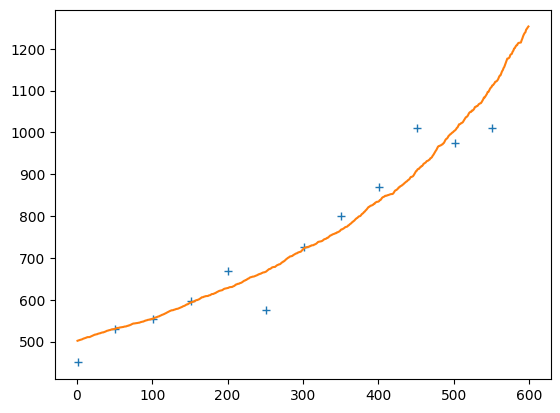

In [7]:
plt.plot(init_conds,medias,'+')
plt.plot(np.arange(1,600,1),teoricas[0:600-1])
plt.show()